# Load the dataset

In [1]:
import pandas as pd

df = pd.read_csv("data/amazon_cells_labelled.txt", sep="\t", header=None, names=["Review", "Sentiment"])
df.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Preprocess the data

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Review"])
sequences = tokenizer.texts_to_sequences(df["Review"])

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)


In [4]:
X = padded_sequences
y = df["Sentiment"]

# Split the dataset into training and testing sets

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 30)
y_train shape: (800,)
X_test shape: (200, 30)
y_test shape: (200,)


# Create the neural network model using Vanilla

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=16))
model.add(SimpleRNN(units=64, return_sequences=True))
model.add(SimpleRNN(units=64))
model.add(Dense(units=1))

# Specify the optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Fit the model

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping]).history

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5210 - loss: 2.8184 - val_accuracy: 0.5375 - val_loss: 0.7292
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6193 - loss: 0.6272 - val_accuracy: 0.5250 - val_loss: 0.7168
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7050 - loss: 0.5572 - val_accuracy: 0.5125 - val_loss: 0.7269
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7362 - loss: 0.4820 - val_accuracy: 0.5625 - val_loss: 0.7344
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8488 - loss: 0.3621 - val_accuracy: 0.6250 - val_loss: 0.8265
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9328 - loss: 0.2720 - val_accuracy: 0.6250 - val_loss: 0.8499
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9731 - loss: 0.1994 - val_accuracy: 0.6250 - val_loss: 0.8264
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9793 - loss: 0.1425 - val_accuracy: 0.6500 - 

# Evaluate the model

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5186 - loss: 0.7954 
Test accuracy: 0.4950
Test loss: 0.8328


# Plot the training & validation loss

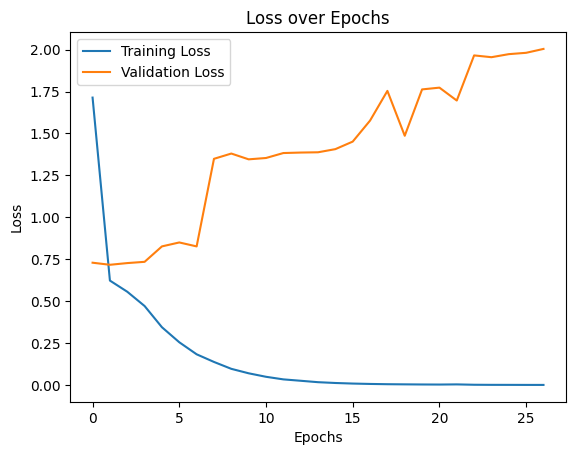

In [10]:
import matplotlib.pyplot as plt

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training & validation accuracy

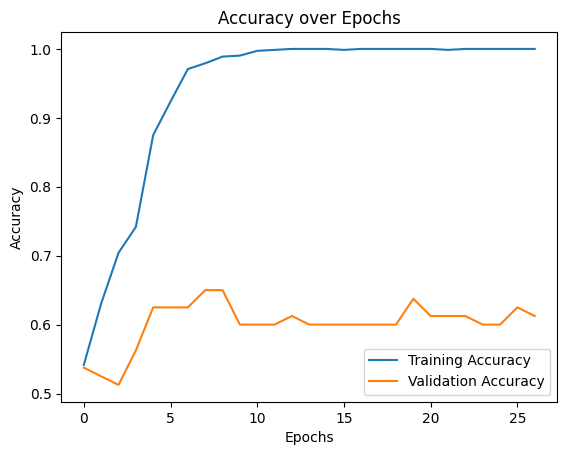

In [11]:
import matplotlib.pyplot as plt

plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()